In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

In [ ]:
# Load dataset
df = pd.read_csv("/content/Housing.csv")  # Ensure file is uploaded to Colab

# Display first few rows
print(df.head())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Handling missing values (drop columns with >30% missing values, fill others with median)
thresh = 0.3 * df.shape[0]
df = df.dropna(thresh=thresh, axis=1)



      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Missing Values:
 price               0
area                0
bedrooms            0
bathrooms       

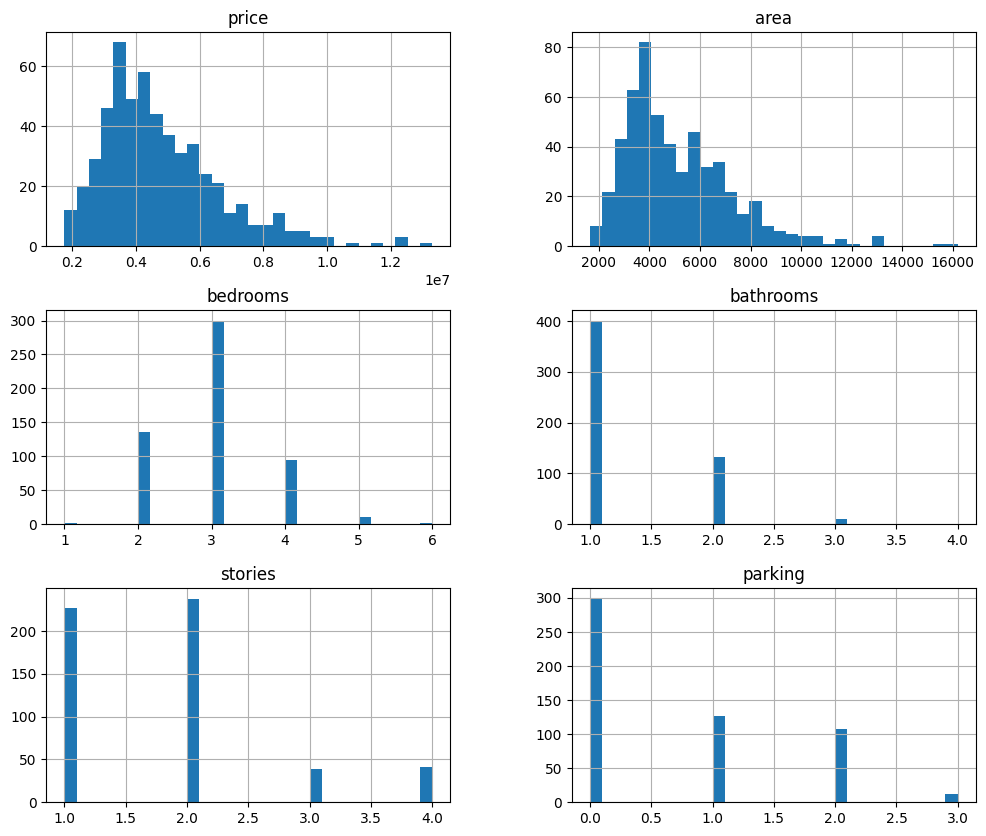

In [ ]:
# Fill only numeric columns with median
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Histogram for numerical columns
df[num_cols].hist(figsize=(12, 10), bins=30)
plt.show()

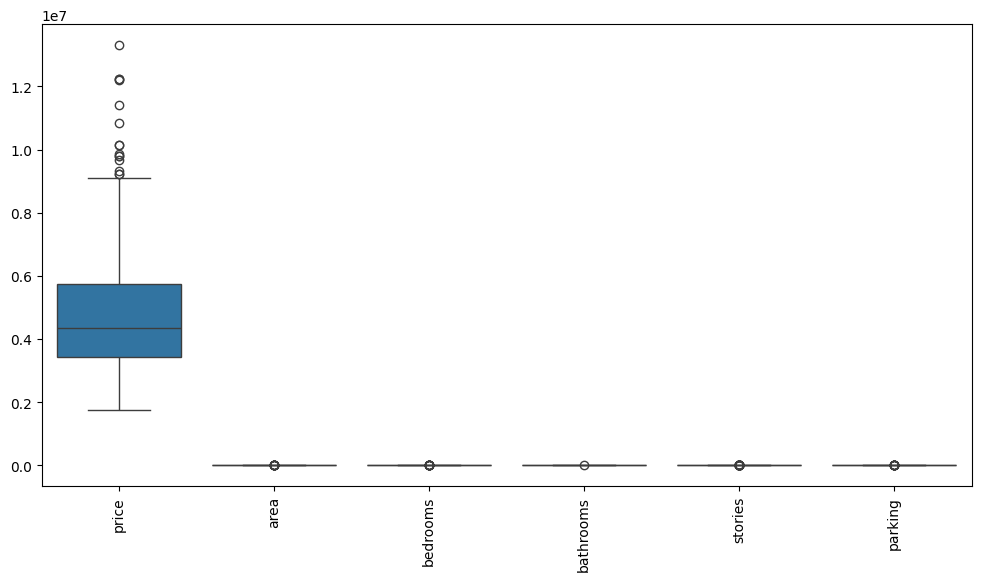

In [ ]:
# Box Plot before Outlier Removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.show()

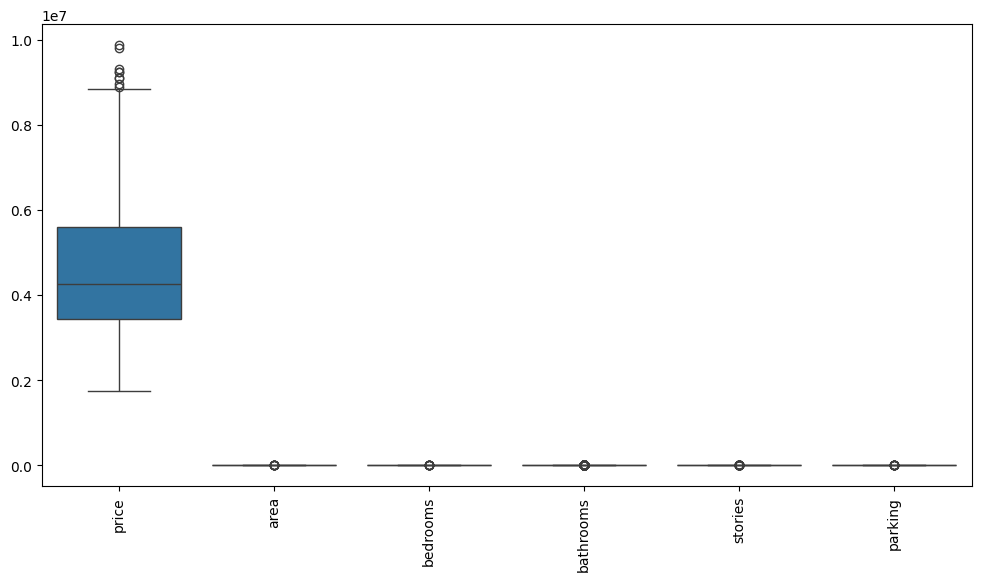

In [ ]:
# Outlier Removal (Z-score method)
df = df[(np.abs(zscore(df[num_cols])) < 3).all(axis=1)]

# Box Plot after Outlier Removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.show()

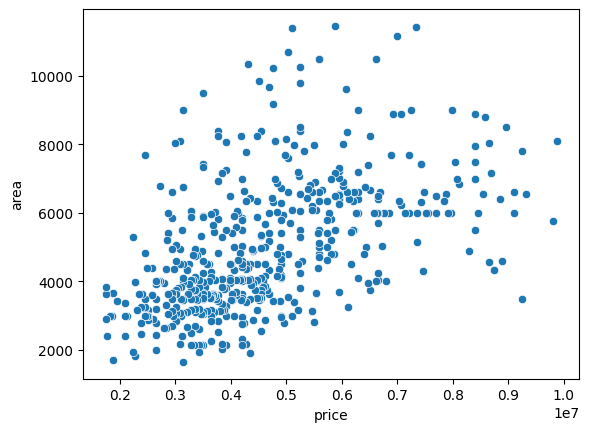

Skewness:
 price        0.801228
area         0.844266
bedrooms     0.298626
bathrooms    1.187898
stories      1.089925
parking      0.900962
dtype: float64
Kurtosis:
 price        0.224186
area         0.464279
bedrooms     0.050054
bathrooms   -0.591177
stories      0.668355
parking     -0.440962
dtype: float64


In [ ]:
# Scatterplot (choosing first two numerical columns dynamically)
if len(num_cols) >= 2:
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]])
    plt.show()

# Skewness & Kurtosis
skewness_values = df[num_cols].skew().mean()
kurtosis_values = df[num_cols].kurtosis().mean()
print("Skewness:\n", df[num_cols].skew())
print("Kurtosis:\n", df[num_cols].kurtosis())

In [ ]:
# Define features and target
if 'price' in df.columns:
    target_col = 'price'
else:
    target_col = df.columns[-1]  # Use the last numerical column if 'price' is missing
X = df[num_cols].drop(columns=[target_col], errors='ignore')
y = df[target_col]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

# Initialize result storage
rmse_values = {}
r2_values = {}

# Train models and store evaluation metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse_values[name] = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_values[name] = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.2f}, R2 Score = {r2:.4f}")

Linear Regression: RMSE = 1441921.84, R2 Score = 0.4316
Decision Tree: RMSE = 1441921.84, R2 Score = 0.4316
Random Forest: RMSE = 1441921.84, R2 Score = 0.4316


In [ ]:
comparison_table = pd.DataFrame({
    "Metric": ["Skewness", "Kurtosis", "RMSE", "R² Score"],
    "Linear Regression": [skewness_values, kurtosis_values, rmse_values["Linear Regression"], r2_values["Linear Regression"]],
    "Decision Tree": [skewness_values, kurtosis_values, rmse_values["Decision Tree"], r2_values["Decision Tree"]],
    "Random Forest": [skewness_values, kurtosis_values, rmse_values["Random Forest"], r2_values["Random Forest"]]
})

# Display final results
print("\nFinal Model Comparison:\n")
print(comparison_table.to_markdown(index=False))


Final Model Comparison:

| Metric   |   Linear Regression |   Decision Tree |   Random Forest |
|:---------|--------------------:|----------------:|----------------:|
| Skewness |         0.853818    |     0.853818    |     0.853818    |
| Kurtosis |         0.0624557   |     0.0624557   |     0.0624557   |
| RMSE     |         1.27707e+06 |     1.77961e+06 |     1.43442e+06 |
| R² Score |         0.554137    |     0.134199    |     0.437502    |
